## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Hypothesis 
#### 6. Reshape of variables
#### 7. Training and test sets
#### 8. Linear regression
#### 9. Plot for test set
#### 10 Model performance stats and Interpretation
#### 11 Compare predicted and actual values
#### 12 Thoughts

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed
# within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/aislingm/Documents/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '6.4', 'Data', 'latest_boat_data.csv'))

In [5]:
df.shape

(9238, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9238 entries, 0 to 9237
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Boat Type Main       9238 non-null   object 
 1   Length               9238 non-null   float64
 2   Width                9238 non-null   float64
 3   Material             9238 non-null   object 
 4   Boat Condition       9238 non-null   object 
 5   Engine Type          9238 non-null   object 
 6   Country              9238 non-null   object 
 7   Price_Range_€        9238 non-null   object 
 8   Price_Eur            9238 non-null   float64
 9   N. views 7d grouped  9238 non-null   object 
 10  N. views last 7d     9238 non-null   int64  
 11  Age Group            9238 non-null   object 
 12  Year Built           9238 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 938.4+ KB


### 2. Data Cleaning

#### a. Consistency Checks

In [7]:
print(df.dtypes)

Boat Type Main          object
Length                 float64
Width                  float64
Material                object
Boat Condition          object
Engine Type             object
Country                 object
Price_Range_€           object
Price_Eur              float64
N. views 7d grouped     object
N. views last 7d         int64
Age Group               object
Year Built               int64
dtype: object


In [8]:
# Checking for unique values in each categorical column to identify
# any unexpected or inconsisten values

categorical_columns = ['Boat Type Main', 'Material', 'Boat Condition', 'Engine Type', 'Country', 'Price_Range_€',
                       'Age Group', 'N. views 7d grouped']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")


Unique values in Boat Type Main:
['Motor Yacht' 'Hardtop' 'Bowrider' 'Sport Boat' 'Cabin Boat'
 'Fishing Boat' 'Pilothouse' 'Wakeboard/Wakesurf' 'Water ski' 'Classic'
 'Mega Yacht' 'Flybridge' 'Trawler' 'Offshore Boat' 'House Boat'
 'Center console boat' 'Deck Boat' 'Runabout' 'Working Boat' 'Catamaran'
 'Pontoon Boat' 'Launch' 'Passenger boat' 'Motorsailer' 'Ketch' 'RIB']

Unique values in Material:
['Plastic' 'GRP' 'Steel' 'Wood' 'Carbon Fiber' 'Unknown' 'Aluminium'
 'Thermoplastic' 'PVC' 'Reinforced concrete' 'Hypalon' 'Rubber']

Unique values in Boat Condition:
['Used boat' 'new boat from stock' 'Display Model' 'new boat on order'
 'Unknown']

Unique values in Engine Type:
['Unknown' 'Diesel' 'Unleaded' 'Electric']

Unique values in Country:
['Switzerland' 'Germany' 'Croatia' 'Austria' 'Thailand'
 'United Arab Emirates' 'Bulgaria' 'France' 'Denmark' 'Czech Republic'
 'Netherlands' 'Italy' 'Spain' 'Portugal' 'Belgium' 'Poland'
 'United Kingdom' 'Sweden' 'Russia' 'Serbia' 'Finland' '

#### b. Subset creation

In [9]:
# select only the necessary columns and put them in a list called columns
columns = ['Year Built', 'Price_Eur', 'Length', 'Width', 'N. views last 7d']

In [10]:
# Create a subset for your supervised machine learning regression
df1 = df[columns]

#### c. Missing Values

In [11]:
# Check for missing values
df1.isnull().sum()

# There are no missing values to handle

Year Built          0
Price_Eur           0
Length              0
Width               0
N. views last 7d    0
dtype: int64

In [12]:
# Check and calculate the percentage of "Unknown" values in the 'Length' and 'Width' 

unknown_length_percentage = (df1['Length'] == 'Unknown').mean() * 100
unknown_width_percentage = (df1['Width'] == 'Unknown').mean() * 100

print(f"Percentage of 'Unknown' values in 'Length': {unknown_length_percentage:.2f}%")
print(f"Percentage of 'Unknown' values in 'Width': {unknown_width_percentage:.2f}%")


Percentage of 'Unknown' values in 'Length': 0.00%
Percentage of 'Unknown' values in 'Width': 0.00%


#### d. Duplicates Check

In [13]:
dups = df1.duplicated()
dups.shape

(9238,)

#### e. Extreme values check

##### Note: During my brainstorming I learned that in recent versions of Seaborn, distplot has been deprecated, and the recommended approach is to use histplot for histograms and kdeplot for kernel density estimates separately. Thus my choice of visualization graph

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_73406/1803654114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price_Eur'], bins=25)


<Axes: xlabel='Price_Eur', ylabel='Density'>

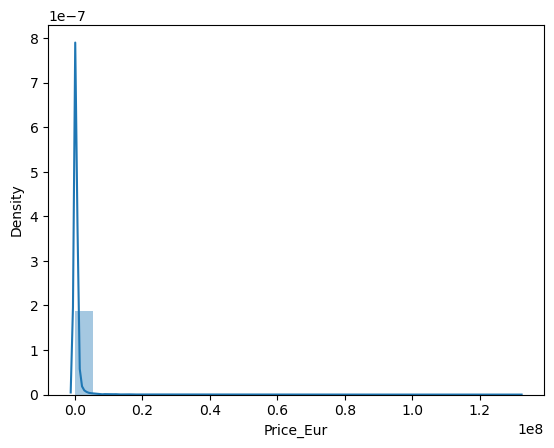

In [14]:
# show extreme values for price
sns.distplot(df1['Price_Eur'], bins=25) 

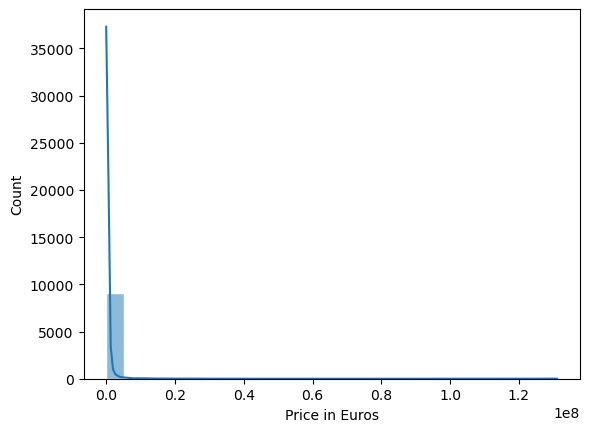

In [15]:

# Create a histogram with kernel density estimate
sns.histplot(df1['Price_Eur'], bins=25, kde=True, edgecolor='white')

# Set the x-axis label
plt.xlabel('Price in Euros')

# Show the plot
plt.show()


In [16]:
mean_price = df1['Price_Eur'].mean()
median_price = df1['Price_Eur'].median()
max_price = df1['Price_Eur'].max()

# Print the results
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Max: {max_price}")

Mean: 480210.31131413725
Median: 98000.0
Max: 131132812.5


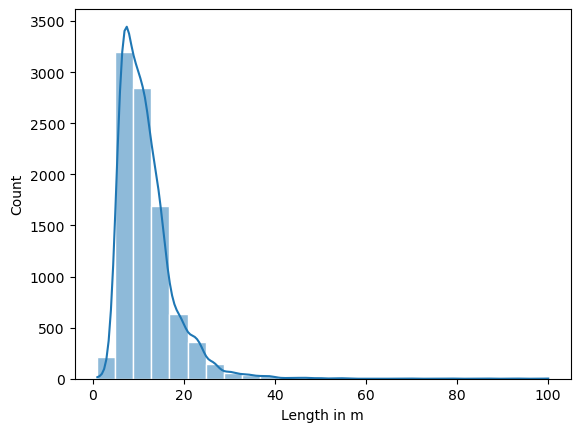

In [17]:
# Extreme values checks for length
sns.histplot(df1['Length'], bins=25, kde=True, edgecolor='white') 

# Set the x-axis label
plt.xlabel('Length in m')

# Show the plot
plt.show()


In [18]:
mean_length = df1['Length'].mean()
median_length = df1['Length'].median()
max_length = df1['Length'].max()

# Print the results
print(f"Mean Length: {mean_length}")
print(f"Median Length: {median_length}")
print(f"Max Length: {max_length}")

Mean Length: 11.718520242476727
Median Length: 10.5
Max Length: 100.0


### 4. Data Preparation for regression analysis

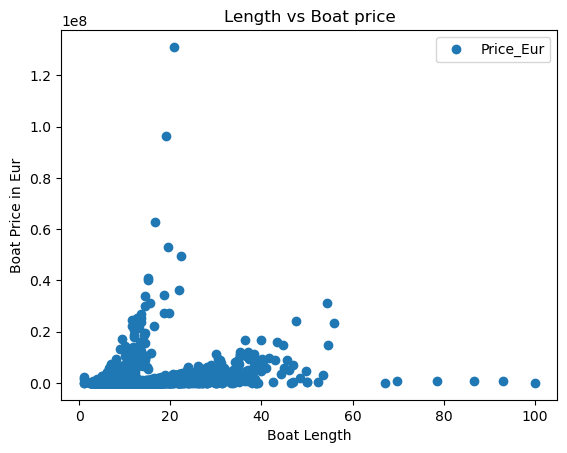

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables 
#plot against each other.

df1.plot(x = 'Length', y = 'Price_Eur', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length vs Boat price')  
plt.xlabel('Boat Length')  
plt.ylabel('Boat Price in Eur')  
plt.show()

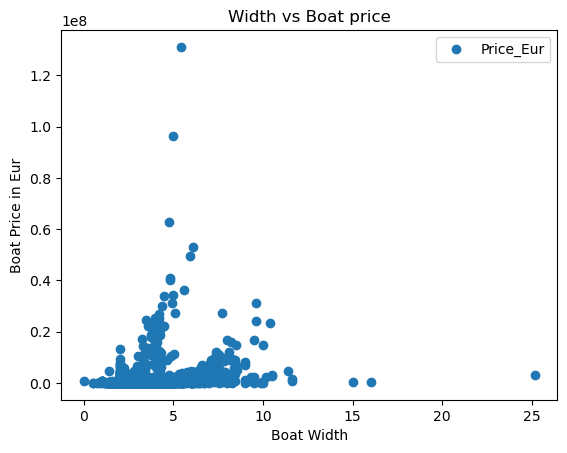

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables
# plot against each other.

df1.plot(x = 'Width', y = 'Price_Eur', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Width vs Boat price')  
plt.xlabel('Boat Width')  
plt.ylabel('Boat Price in Eur')  
plt.show()

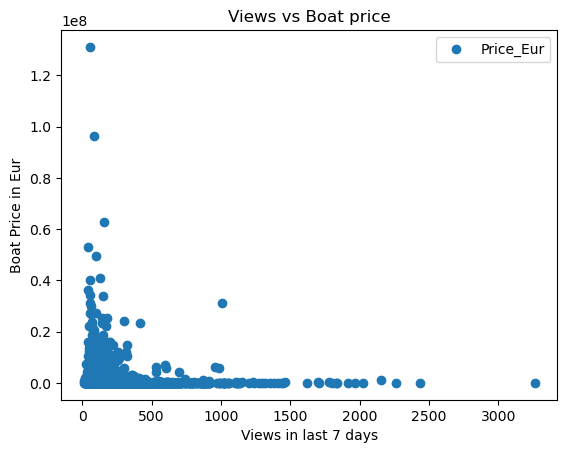

In [21]:

# Create a scatterplot using matplotlib for another look at how the chosen variables
# plot against each other.

df1.plot(x = 'N. views last 7d', y = 'Price_Eur', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Views vs Boat price')  
plt.xlabel('Views in last 7 days')  
plt.ylabel('Boat Price in Eur')  
plt.show()

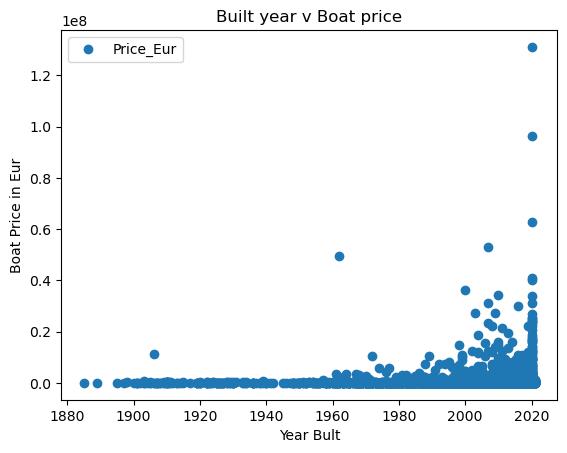

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables
# plot against each other.

df1.plot(x= 'Year Built', y= 'Price_Eur' , style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Built year v Boat price')  
plt.xlabel('Year Bult')  
plt.ylabel('Boat Price in Eur')  
plt.show()

#### Note to Tutor: If I had had the time I would have liked to reshape all the variables and create a regression analysis for each of the above variable combinations as they all give rise to formulating a hypothesis. 

### 5. Hypothesis

The price of boats increases as the length of boats increases. This hypothesis is based on a positive correlation between the length of a boat and its price. There are several obvious factors that would backup our initial insight, like material costs, labor and manufacturing costs, engine power etc.

### 6. Reshape Variables

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Length'].values.reshape(-1,1)
y = df1['Price_Eur'].values.reshape(-1,1)

In [24]:
X

array([[ 7.7 ],
       [11.12],
       [12.35],
       ...,
       [10.36],
       [ 6.41],
       [20.3 ]])

In [25]:
y

array([[ 14304. ],
       [ 33600. ],
       [120864. ],
       ...,
       [200056.5],
       [ 53900. ],
       [580000. ]])

### 7. Training and Tests sets

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Linear regression

In [27]:
# Create a regression object
regression = LinearRegression()

# Fit the regression object into the training set
regression.fit(X_train, y_train)

# Predicting the values of y by using the values of X
y_predicted = regression.predict(X_test)

# Inspect the results
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)


Coefficients: [[98485.64684301]]
Intercept: [-656755.56655147]


### 9. Plot for test set

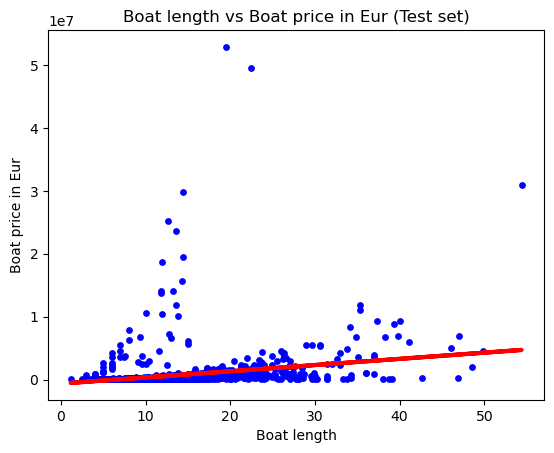

In [28]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat length vs Boat price in Eur (Test set)')
plot_test.xlabel('Boat length')
plot_test.ylabel('Boat price in Eur')
plot_test.show()

### 10. Model performance stats and interpretation

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)  # This is the mean squared error

r2 = r2_score(y_test, y_predicted)  # This is the R2 score.

# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[98485.64684301]]
Mean squared error:  3969306376312.3735
R2 score:  0.07862574224766916


Slope (Coefficient): The coefficient, representing the slope in our linear regression model, is approximately 98,486. This implies that, for each incremental unit in the predictor variable (the boat's length), the model predicts an increase of around 98,486 units in the response variable (price).

Mean Squared Error (MSE): The mean squared error is a measure of how well the model's predictions align with the actual values. In our case, the mean squared error is quite large (3,969,306,376,312.37). Larger values indicate a poorer fit of the model to the data.

R2 Score: The R2 score assesses the extent to which the independent variable(s) elucidate the variability in the dependent variable. Our R2 score of 0.079 is relatively low, suggesting that our model accounts for only a small portion of the variance in the data. A higher R2 score, closer to 1, would signify a more robust fit.

Conclusion: While the positive slope supports our initial hypothesis of a positive association between boat length and price, the substantial mean squared error and relatively low R2 score indicate that the model's fit to the data is suboptimal. Other factors influencing price, not captured by boat length alone exist as we initially pointed out.

In [30]:
y_predicted

array([[ 465980.80745882],
       [1428185.57711501],
       [ 840226.26546225],
       ...,
       [ 456132.24277452],
       [1106137.51193837],
       [ 831362.55724638]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,56000.0,4.659808e+05
1,750000.0,1.428186e+06
2,479000.0,8.402263e+05
3,26000.0,1.833270e+05
4,26900.0,-1.741759e+05
5,288000.0,8.500748e+05
6,70000.0,7.006851e+04
7,60000.0,3.182523e+05
8,89500.0,7.220435e+05
9,32060.0,-1.012965e+05


### 11. Compare predicted and actual values

In [32]:
# Predict on the training set.
y_predicted_train = regression.predict(X_train)
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

# Print the model summary statistics for the training set.
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[98485.64684301]]
Mean squared error:  8045673780067.746
R2 score:  0.04242028630750749


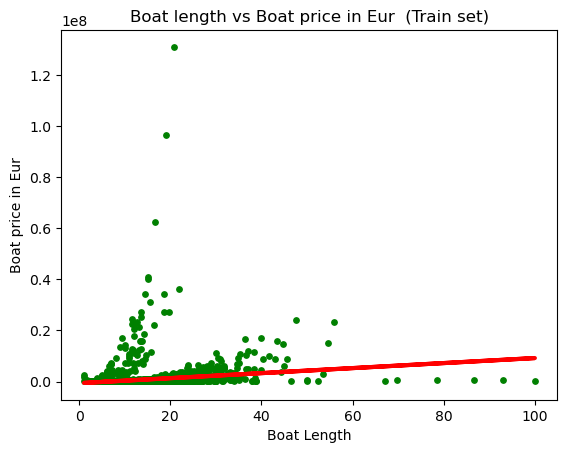

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Boat length vs Boat price in Eur  (Train set)')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Boat price in Eur')
plot_test.show()

### 12. Thougths

The results on the training set are consistent with the evaluation on the test set.

Slope (Coefficient): The slope remains approximately 98,486, indicating that for each unit increase in the predictor variable (presumably boat length), the predicted response variable (price) on the training set increases by approximately 98,486 units.

Mean Squared Error (MSE): The mean squared error on the training set is notably large at 8,045,673,780,067.75, mirroring the test set results. This suggests that the model's predictions deviate significantly from the actual values on the training set, reinforcing the notion that the model might not be fitting the data well.

R2 Score: The R2 score on the training set is 0.042, consistent with the test set. This low R2 score indicates that the model explains only a small proportion of the variance in the training data.

Overall Thoughts:

The positive slope supports the initial hypothesis of a positive relationship between boat length and price.
However, both the mean squared error and R2 score on both the training and test sets suggest that the model does not fit the data well. This implies that other factors influencing the price may not be adequately captured, highlighting the need for further exploration and refinement.